# Data Loading and Exploration

## Loading the Dataset
First, let's import the necessary libraries and load the dataset.

In [1]:
import pandas as pd

# Load the dataset
url = 'hotel_bookings.csv'  # Replace with actual file path or Kaggle API access
data = pd.read_csv(url)

# Display the first few rows
print(data.head())

   index         hotel  is_canceled  lead_time  arrival_date_year  \
0      0  Resort Hotel            0        342               2015   
1      1  Resort Hotel            0        737               2015   
2      2  Resort Hotel            0          7               2015   
3      3  Resort Hotel            0         13               2015   
4      4  Resort Hotel            0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type  agent  \
0                        0                  

## Initial Exploration
Next, perform an initial exploration to understand the dataset's structure:

In [3]:
# Get basic information about the dataset
data.info()

# Get descriptive statistics for numerical columns
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

# Data Cleaning

## Handling Missing Values
If there are missing values, we can handle them appropriately, either by filling or dropping them.

In [4]:
# Fill missing values or drop columns/rows with excessive missing values
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values
# Alternatively, use dropna() to remove rows with missing values
data=data.dropna()
print(data.isnull().sum())

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

# Exploratory Data Analysis (EDA)

## Univariate Analysis
We'll look at the distribution of key variables like lead_time, adr (average daily rate), and stays_in_weekend_nights.

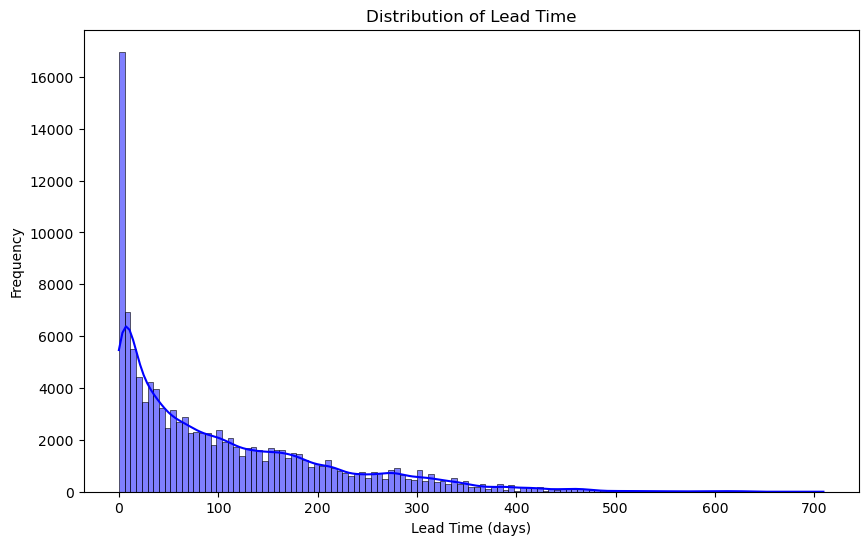

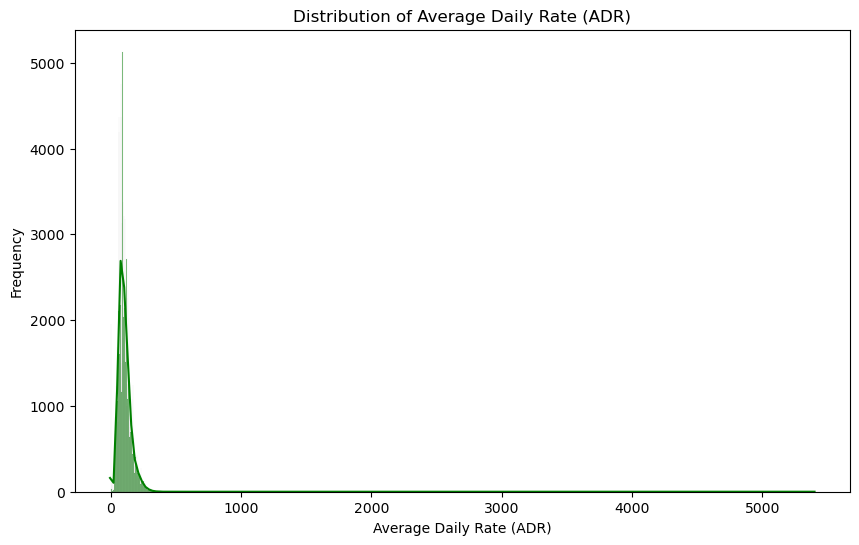

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of lead_time
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of adr (Average Daily Rate)
plt.figure(figsize=(10, 6))
sns.histplot(data['adr'], kde=True, color='green')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis
Explore the relationship between is_canceled and other variables such as lead_time, adr, and stays_in_weekend_nights.

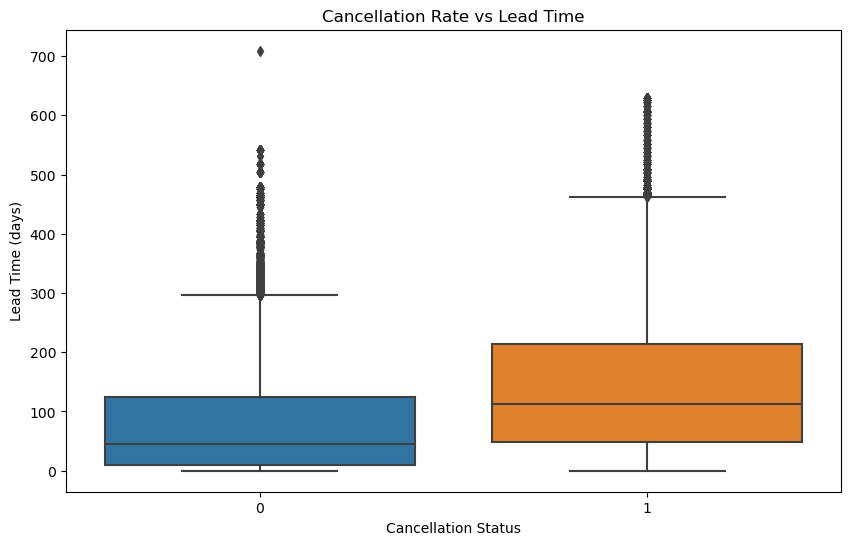

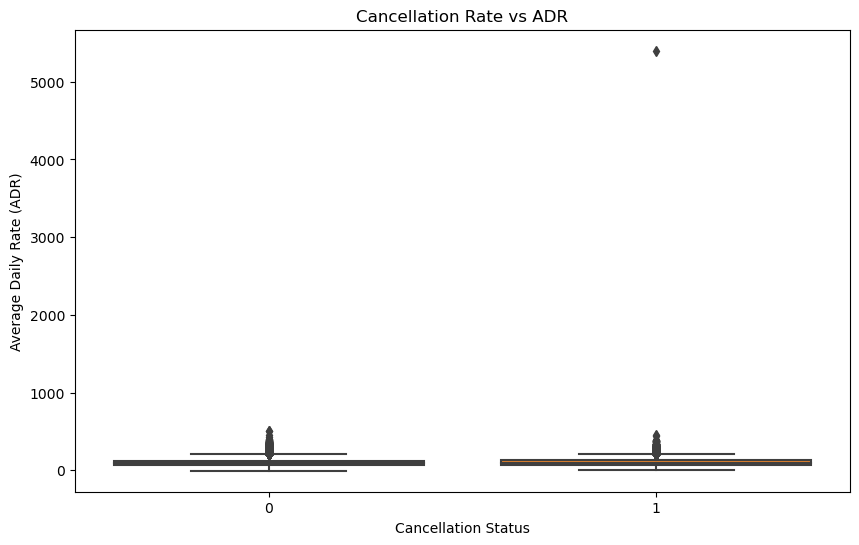

In [7]:
# Visualizing the cancellation rate with respect to lead time
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Cancellation Rate vs Lead Time')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time (days)')
plt.show()

# Visualizing ADR with respect to cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='adr', data=data)
plt.title('Cancellation Rate vs ADR')
plt.xlabel('Cancellation Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Statistical Analysis

## Hypothesis Testing
You could test hypotheses, for example, whether lead_time differs significantly between canceled and non-canceled bookings using a t-test.

In [8]:
from scipy import stats

# T-test to compare lead_time between canceled and non-canceled bookings
canceled = data[data['is_canceled'] == 1]['lead_time']
not_canceled = data[data['is_canceled'] == 0]['lead_time']

t_stat, p_value = stats.ttest_ind(canceled, not_canceled)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 105.95874421396827, P-value: 0.0


## Segmentation

In [10]:
# Create customer segments based on the number of guests
data['customer_segment'] = pd.cut(data['adults'] + data['children'] + data['babies'], bins=[0, 1, 2, 3, 5, 10, 20], labels=["1", "2", "3", "4-5", "6-10", "10+"])

# Group by customer segments and calculate cancellation rates
segment_cancellation = data.groupby('customer_segment')['is_canceled'].mean()
print(segment_cancellation)


customer_segment
1       0.290314
2       0.397009
3       0.321803
4-5     0.413182
6-10    0.666667
10+     0.750000
Name: is_canceled, dtype: float64


# Insights and Reporting

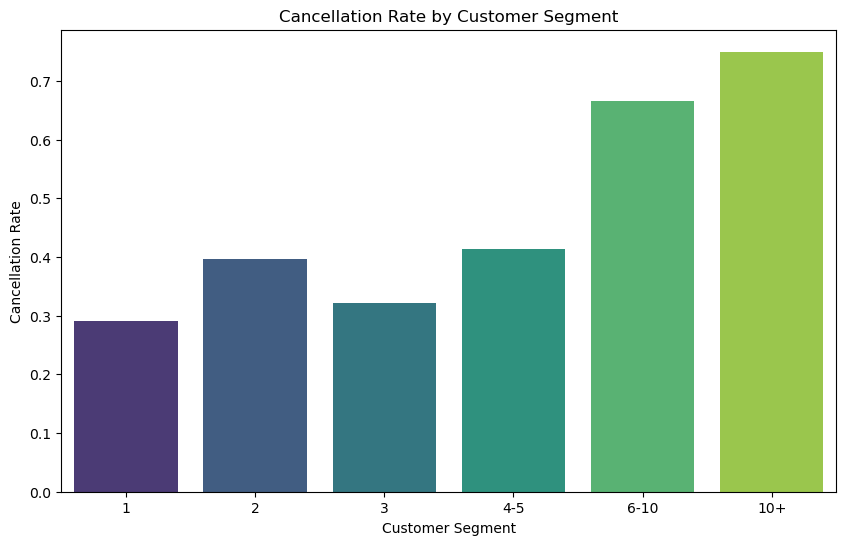

In [11]:
#bar plot showing cancellation rates for different customer segments
# Visualize cancellation rates by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_cancellation.index, y=segment_cancellation.values, palette='viridis')
plt.title('Cancellation Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Cancellation Rate')
plt.show()

## Lead Time Analysis
- Analyze the relationship between lead_time and is_canceled.
- Compare adr (average daily rate) across different lead_time bins.

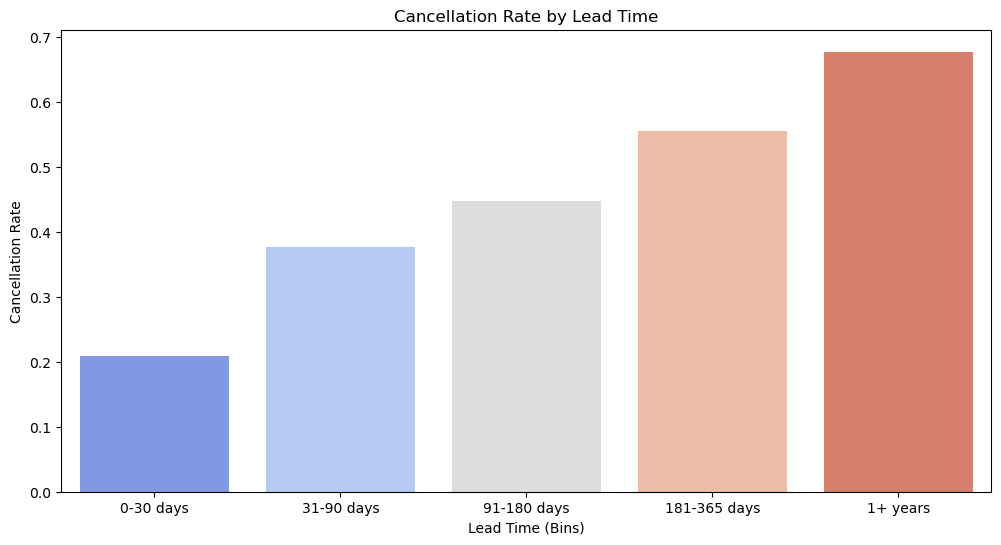

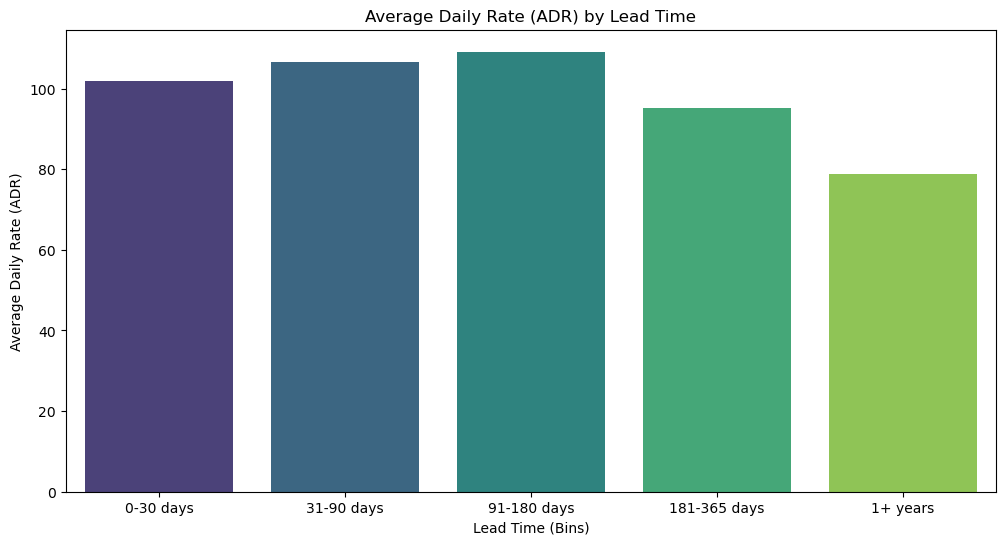

In [12]:

# Binning lead_time for better visualization
data['lead_time_bins'] = pd.cut(data['lead_time'], bins=[0, 30, 90, 180, 365, 1000], 
                                labels=['0-30 days', '31-90 days', '91-180 days', '181-365 days', '1+ years'])

# Plotting cancellation rates by lead_time bins
plt.figure(figsize=(12, 6))
cancel_rate = data.groupby('lead_time_bins')['is_canceled'].mean()
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='coolwarm')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (Bins)')
plt.ylabel('Cancellation Rate')
plt.show()

# Plotting ADR by lead_time bins
plt.figure(figsize=(12, 6))
adr_by_lead_time = data.groupby('lead_time_bins')['adr'].mean()
sns.barplot(x=adr_by_lead_time.index, y=adr_by_lead_time.values, palette='viridis')
plt.title('Average Daily Rate (ADR) by Lead Time')
plt.xlabel('Lead Time (Bins)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

### Insights:
- Cancellation Trends: Longer lead times generally lead to higher cancellation rates.
- ADR Trends: Customers booking with longer lead times may also spend more, reflected in higher ADR values.

## Booking Patterns by Customer Type
Analyze is_canceled and adr for repeated vs. non-repeated guests.

<Figure size 1200x600 with 0 Axes>

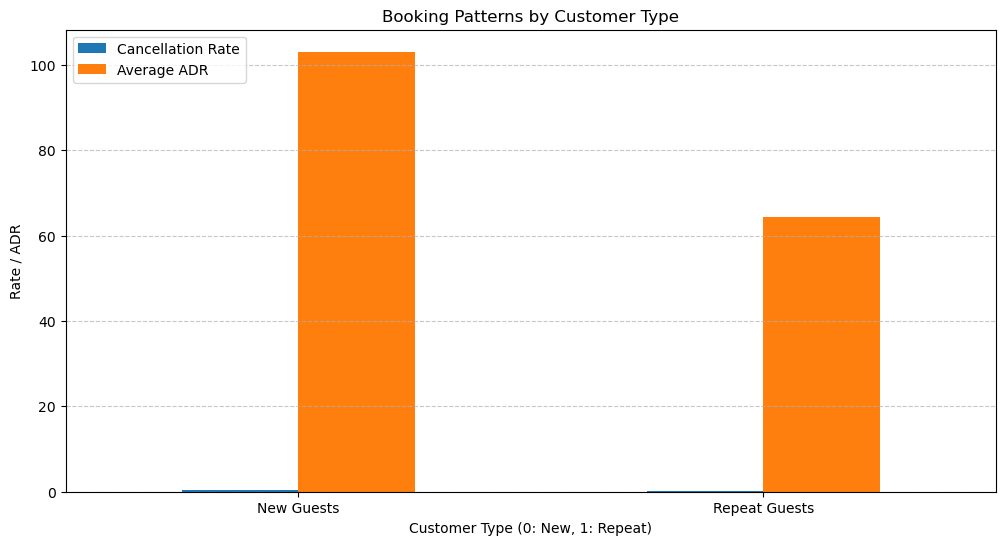

In [13]:
# Cancellation rate and ADR comparison for repeated vs. non-repeated guests
repeat_guest_stats = data.groupby('is_repeated_guest')[['is_canceled', 'adr']].mean()
repeat_guest_stats = repeat_guest_stats.rename(columns={'is_canceled': 'Cancellation Rate', 'adr': 'Average ADR'})

# Visualize the stats
plt.figure(figsize=(12, 6))
repeat_guest_stats.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Booking Patterns by Customer Type')
plt.ylabel('Rate / ADR')
plt.xlabel('Customer Type (0: New, 1: Repeat)')
plt.xticks(ticks=[0, 1], labels=['New Guests', 'Repeat Guests'], rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Insights:
- Repeat Guests: Repeat guests show significantly lower cancellation rates and spend slightly more (higher ADR).
- New Guests: New guests exhibit higher cancellation rates, indicating more uncertainty in their bookings.

## Segment-Wise Analysis
Segment customers based on the total number of guests (adults, children, and babies).

<Figure size 1200x600 with 0 Axes>

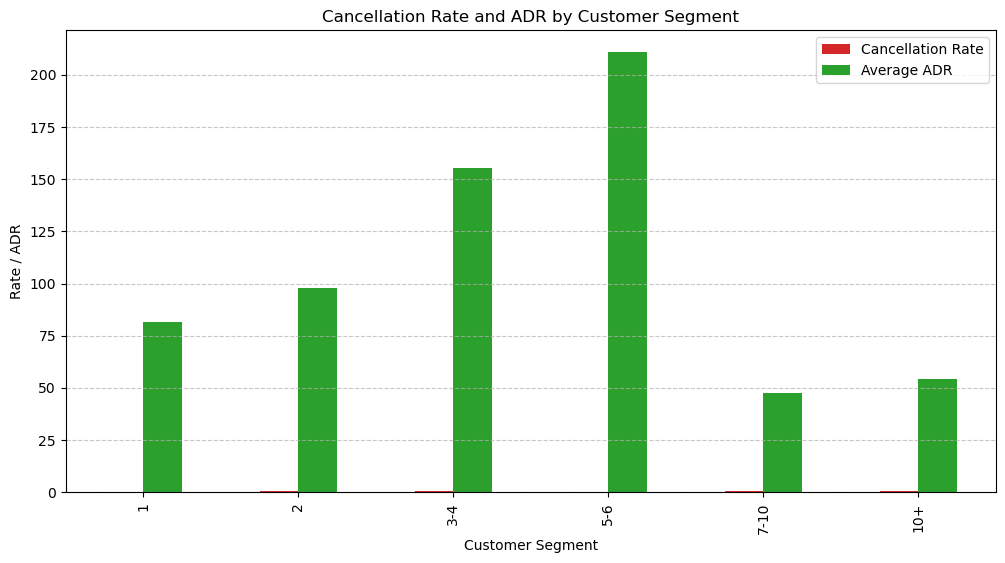

In [15]:
# Customer segmentation
data['customer_segment'] = pd.cut(data['adults'] + data['children'] + data['babies'], 
                                  bins=[0, 1, 2, 4, 6, 10, 20], 
                                  labels=["1", "2", "3-4", "5-6", "7-10", "10+"])

# Calculate cancellation rates and ADR by segment
segment_stats = data.groupby('customer_segment')[['is_canceled', 'adr']].mean()
segment_stats = segment_stats.rename(columns={'is_canceled': 'Cancellation Rate', 'adr': 'Average ADR'})

# Visualize the stats
plt.figure(figsize=(12, 6))
segment_stats.plot(kind='bar', figsize=(12, 6), color=['#d62728', '#2ca02c'])
plt.title('Cancellation Rate and ADR by Customer Segment')
plt.ylabel('Rate / ADR')
plt.xlabel('Customer Segment')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Insights:
- Cancellation Rate: Segments with more people(7-10+) (e.g., families with children) have higher cancellation rates also less ADR.
- Profitability: Smaller groups (5-6 people) tend to spend more on ADR, making them more profitable.

# Based on Insights:
- Target Marketing for Repeat Guests: Create loyalty programs to encourage repeat guests since they cancel less and spend more.
- Discounts for Long Lead Times: Introduce non-refundable discounts for long lead-time bookings to mitigate cancellations.
- Focus on Small Groups: Offer premium services tailored for solo travelers or couples who exhibit higher ADR values.